In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import yaml
import omegaconf
import json

from scipy.spatial.distance import cdist

In [74]:
print(1114*1114)

1240996


In [5]:
def compute_hist_sim_zij(model_path, emb_types=['val'], q=0.1, threshold=0.95, save=False, verbose=False):
    path = model_path + '/cingulate_HCP_embeddings'
    for emb_type in emb_types:
        # load the data
        full_path = path + f'/{emb_type}_embeddings.csv'
        embs = pd.read_csv(full_path, index_col=0)

        # compute the similarities
        sims = cdist(embs, embs, metric='cosine')
        sims = 1 - sims

        # plot them
        x = [sims[i,j] for i in range(embs.shape[0]) for j in range(embs.shape[0]) if i < j]
        if verbose:
            print(len(x), np.sum(range(embs.shape[0])))

        if save:
            x = np.array(x)
            np.save(path+f'/{emb_type}_hist_sim_zij.npy', x)
            

        plt.figure()
        plt.hist(x, bins=np.linspace(-1,1,50))
        plt.title(f"{emb_type} embeddings")

        # check if model to exclude based on similarity repartition (using quantile)
        quant = np.quantile(x, q)
        print("10% lowest similarity", quant)
        good_model = True
        if quant >= threshold:
            good_model = False
            print(f"PROBLEMATIC MODEL: {model_path}")

        if save:
            plt.savefig(path+f'/{emb_type}_hist_sim_zij.jpg')
            good_model_dict = {'quantile-percentage': q,
                               'quantile': quant,
                               'threshold': threshold,
                               'exclude': not good_model}
            with open(path+'/good_model.json', 'w') as file:
                json.dump(good_model_dict, file) 
        else:
            plt.show()

10% lowest similarity -0.2297848316873048


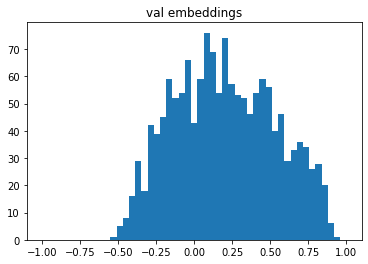

In [6]:
model_path = "/neurospin/dico/agaudin/Runs/04_pointnet/Output/2022-09-01/conv_T=0.5"

compute_hist_sim_zij(model_path, save=True)

In [93]:
np.load("/neurospin/dico/agaudin/Runs/04_pointnet/Output/2022-09-01/conv_T=0.5/cingulate_HCP_embeddings/val_hist_sim_zij.npy")

array([ 0.68920322,  0.17876633, -0.40983112, ...,  0.63760855,
       -0.21477758, -0.07944008])

## Loop inspired from embeddings_pipeline